In [155]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [165]:
sys.path.append(r"C:\Users\4019-tjyen\Desktop\plotlib\Visualization\yunchieh_plotlib")
print(sys.path)

['c:\\Users\\4019-tjyen\\Desktop\\infer_result', 'c:\\Users\\4019-tjyen\\anaconda\\python312.zip', 'c:\\Users\\4019-tjyen\\anaconda\\DLLs', 'c:\\Users\\4019-tjyen\\anaconda\\Lib', 'c:\\Users\\4019-tjyen\\anaconda', '', 'c:\\Users\\4019-tjyen\\anaconda\\Lib\\site-packages', 'c:\\Users\\4019-tjyen\\anaconda\\Lib\\site-packages\\win32', 'c:\\Users\\4019-tjyen\\anaconda\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\4019-tjyen\\anaconda\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\4019-tjyen\\Desktop\\plotlib\\Visualization\\yunchieh_plotlib', 'C:\\Users\\4019-tjyen\\Desktop\\plotlib\\Visualization\\yunchieh_plotlib', 'C:\\Users\\4019-tjyen\\Desktop\\plotlib\\Visualization\\yunchieh_plotlib', 'C:\\Users\\4019-tjyen\\Desktop\\plotlib\\Visualization\\yunchieh_plotlib']


In [166]:
# Import module 
from Plot_function import plot_error_bar

In [179]:
from layout_settings import *
from legend_settings import *

In [168]:
# Load file
data = pd.read_csv(r"C:\Users\4019-tjyen\Downloads\infer_results_02012024.csv", sep="\t")

In [169]:
# mean and std for each epoch
summary = data.groupby("epoch")["num_links"].agg(["mean", "std"]).reset_index()

In [170]:
# 1.96 * std
summary["1.96_std"] = 1.96 * summary["std"]

In [171]:
data_unique = data.merge(summary[["epoch", "mean", "1.96_std"]], on="epoch", how="left")

In [172]:
data_unique = data_unique.drop_duplicates(subset=["epoch", "mean", "1.96_std"])

In [173]:
print(data_unique)

      epoch  num_links  ks_pvalue  ks_stat  infer_time       mean   1.96_std
0        24  54.000000   0.716647     0.14    3.181993  34.490000  13.636296
100      49  41.000000   0.966746     0.10    2.694381  41.375000   6.270229
200      74  42.000000   0.869262     0.12    2.711025  44.950000   4.572273
300      99  45.000000   0.999995     0.06    2.705329  43.339985   6.483985
400     124  41.500000   0.869262     0.12    2.697895  43.564414   5.853294
500     149  41.000000   0.869262     0.12    2.696346  44.299403   5.094829
600     174  46.000000   0.869262     0.12    2.690243  44.195000   5.571463
700     199  47.000000   0.067795     0.26    2.704380  46.070000   4.129741
800     224  47.000000   0.395940     0.18    2.692098  44.725000   5.463294
900     249  43.500000   0.966746     0.10    2.704717  45.675305   4.060480
1000    274  47.000000   0.869262     0.12    2.702657  46.645714   4.086122
1100    299  44.000000   0.716647     0.14    2.711230  45.745000   4.405862

In [174]:
print(data_unique.head())

     epoch  num_links  ks_pvalue  ks_stat  infer_time       mean   1.96_std
0       24       54.0   0.716647     0.14    3.181993  34.490000  13.636296
100     49       41.0   0.966746     0.10    2.694381  41.375000   6.270229
200     74       42.0   0.869262     0.12    2.711025  44.950000   4.572273
300     99       45.0   0.999995     0.06    2.705329  43.339985   6.483985
400    124       41.5   0.869262     0.12    2.697895  43.564414   5.853294


In [175]:
# Check missing value
print(data_unique.isna().sum())

epoch         0
num_links     0
ks_pvalue     0
ks_stat       0
infer_time    0
mean          0
1.96_std      0
dtype: int64


C:\Users\4019-tjyen\AppData\Local\Temp\ipykernel_32440\1457861769.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


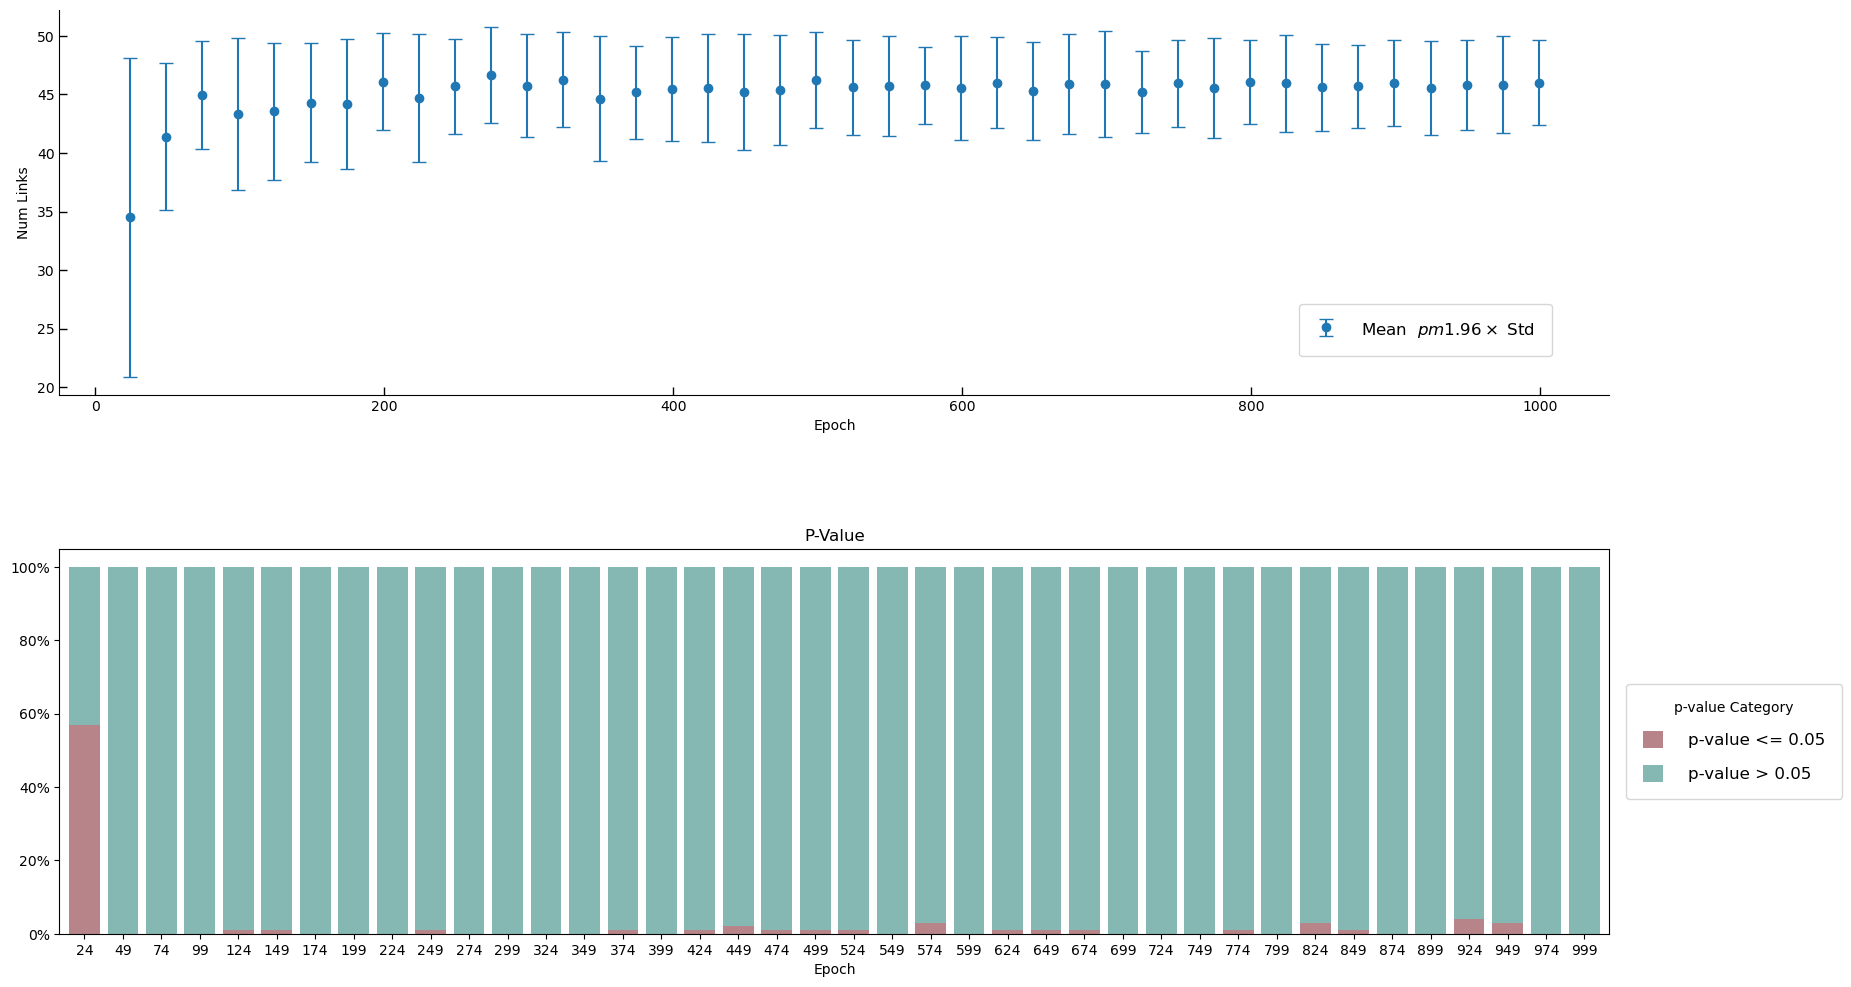

In [180]:
# Plot Result

# First Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,12), gridspec_kw={"hspace":0.4})

plot_error_bar(
    ax1, data_unique, x_col="epoch", y_col="mean", error_col="1.96_std",
    set_xlabel="Epoch", set_ylabel="Num Links",
    tick_params={"direction": "in", "length": 6, "width" : 1}
)

ax1.legend(
    loc= "lower left",
    bbox_to_anchor=(0.8, 0.1),
    fontsize=legend_fontsize,
    **legend_kwarg
)


# Second Plot

data["p_value_category"] = (data["ks_pvalue"] > 0.05).astype(int)

#print(data) 

epoch_grouped = data.groupby("epoch")["p_value_category"].value_counts(normalize=True).unstack(fill_value=0)

#print(epoch_grouped)


epoch_grouped.plot(kind="bar", stacked=True, ax=ax2, color=colors, width=0.8)

ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))

ax2.set_xlabel("Epoch")
ax2.set_title("P-Value")
ax2.tick_params(axis="x",rotation=0)


# Legend settings
ax2.legend(
    title="p-value Category",
    labels=legend_labels,
    loc=legend_loc,
    bbox_to_anchor=bbox_to_anchor,
    fontsize=legend_fontsize,
    **legend_kwarg
)


       
plt.tight_layout()
plt.savefig(save_file_name, format="png", dpi="figure")
plt.show()

